# Importing Data

In [18]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [19]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manuplation

In [36]:
#We do not require the customerID column so we remove it:
df = df.drop(['customerID'] , axis='columns')

In [37]:
df.dtypes
#OUr objective is to convert each one to numeric dtype

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
df.TotalCharges.values
#These are stored as string in the array. we need to convert them into numbers

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [39]:
pd.to_numeric(df.TotalCharges)
#An error will occur as there are some data which have blank information.
#in such case, "" cannot be converted to a number

ValueError: Unable to parse string " " at position 488

In [40]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')
#this will convert str to float and will define blank spaces as NaN
#so we will remove the rows which have information stored as blank string.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [41]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]
#this will show which rows have blank string information.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [42]:
df.iloc[488]['TotalCharges']

' '

In [43]:
#We Will Create another dataFrame in which we will neglect the ones with blank string:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [44]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
#We will thus convert object dtype to numeric

C:\Users\Urvesh Parmar\AppData\Local\Temp\ipykernel_20008\1396736887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [45]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

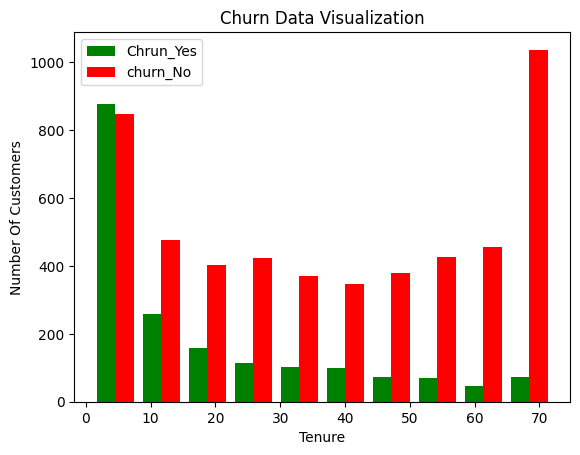

In [47]:
#Now we will use a histogram to get an idea of the data.
#we will use tenure to see how the time spent wiht company affects the churn.
churn_no = df1[df1.Churn == 'No'].tenure
churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number Of Customers')
plt.title('Churn Data Visualization')
plt.hist([churn_yes , churn_no], color=['green','red'] , label=['Chrun_Yes' , 'churn_No'])
plt.legend()

In [48]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [51]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')
    
#.unique() function will return all the unique valules in specified df[]:
#Since NO interset Service is similar to a no input therefore we replace it
#in the particular columns.

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [52]:
df1.replace('No internet service' , 'No' , inplace=True)
df1.replace('No phone service' , 'No' , inplace=True)
#Ignore Warining
#inplace is similar to df1 = df1.something()

C:\Users\Urvesh Parmar\AppData\Local\Temp\ipykernel_20008\928069211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No' , inplace=True)
C:\Users\Urvesh Parmar\AppData\Local\Temp\ipykernel_20008\928069211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No' , inplace=True)


In [53]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [56]:
no_yes_columns = []
for columns in df:
    if df[column][0] == 'Yes' or df[column][0] == 'No':
        no_yes_columns.append(columns)
no_yes_columns
#Print Columns which have Yes/No as only input

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [60]:
for col in no_yes_columns:
    df1.replace({'Yes' : 1 , 'No' : 0 , 'Female' : 0 , 'Male' : 1}, inplace=True)
df1
#replacing Yes with 1 and no with 0 and female as 0 and male as 1

C:\Users\Urvesh Parmar\AppData\Local\Temp\ipykernel_20008\4112428719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes' : 1 , 'No' : 0 , 'Female' : 0 , 'Male' : 1}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [62]:
#Applying One Hot Encoding to 'INTERNET SERVICE' column:
df2 = pd.get_dummies(data=df1 , columns=['InternetService', 'Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [64]:
for columns in df2:
    print(f'{columns} : {df2[columns].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [66]:
# Now we need to apply feature scaling to the columns TENURE , MONTHLYCHARGES , TOTALCHARGES:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5090,1,1,1,0,0.084507,1,1,1,1,0,...,0,0,1,1,0,0,0,1,0,0
2571,0,0,1,1,0.577465,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3434,0,0,0,0,0.140845,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [67]:
for cols in df2:
    print(f'{cols} : {df2[cols].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Training Neural Network

In [69]:
import keras
from keras import Sequential 
from keras.layers import Dense

In [70]:
#defining Input and Output variables:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']
print(x.shape)
print(y.shape)

(7032, 26)
(7032,)


#Splitting Data in test and train sets:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state=5)
x_train

In [87]:
model = Sequential([
    Dense(25 , input_shape = (26,) , activation='relu'),
    Dense(20,activation='relu'),
    Dense(18,activation='relu'),
    Dense(16,activation='relu'),
    Dense(14,activation='relu'),
    Dense(12,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1 ,activation='sigmoid')
])

#here input_shape determine the input layer. The 25 is the first hidden layer.
#the 1 is the output layer

In [91]:
model.compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 998us/step - loss: 0.2506 - accuracy: 0.8878
Epoch 2/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.8841
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8866
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8853
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.8807
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2550 - accuracy: 0.8802
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.8896
Epoch 8/500
176/176 [==============================] - 0s 994us/step - loss: 0.2463 - accuracy: 0.8853
Epoch 9/500
176/176 [==============================] - 0s 996us/step - loss: 0.2482 - accuracy: 0.8880
Epoch 10/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2448 - 

176/176 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.8916
Epoch 81/500
176/176 [==============================] - 0s 985us/step - loss: 0.2300 - accuracy: 0.8958
Epoch 82/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8910
Epoch 83/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.8976
Epoch 84/500
176/176 [==============================] - 0s 994us/step - loss: 0.2323 - accuracy: 0.8916
Epoch 85/500
176/176 [==============================] - 0s 929us/step - loss: 0.2329 - accuracy: 0.8917
Epoch 86/500
176/176 [==============================] - 0s 917us/step - loss: 0.2263 - accuracy: 0.8953
Epoch 87/500
176/176 [==============================] - 0s 979us/step - loss: 0.2328 - accuracy: 0.8930
Epoch 88/500
176/176 [==============================] - 0s 989us/step - loss: 0.2390 - accuracy: 0.8944
Epoch 89/500
176/176 [==============================] - 0s 977us/step - loss: 0.228

176/176 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9060
Epoch 160/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.8999
Epoch 161/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9003
Epoch 162/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.8981
Epoch 163/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9058
Epoch 164/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.8987
Epoch 165/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.8976
Epoch 166/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9028
Epoch 167/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2059 - accuracy: 0.9081
Epoch 168/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2158 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9083
Epoch 239/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9077
Epoch 240/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9090
Epoch 241/500
176/176 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9058
Epoch 242/500
176/176 [==============================] - 0s 994us/step - loss: 0.2038 - accuracy: 0.9051
Epoch 243/500
176/176 [==============================] - 0s 989us/step - loss: 0.1931 - accuracy: 0.9159
Epoch 244/500
176/176 [==============================] - 0s 920us/step - loss: 0.2102 - accuracy: 0.9072
Epoch 245/500
176/176 [==============================] - 0s 986us/step - loss: 0.1957 - accuracy: 0.9115
Epoch 246/500
176/176 [==============================] - 0s 1000us/step - loss: 0.1951 - accuracy: 0.9111
Epoch 247/500
176/176 [==============================] - 0s 1ms/step - loss:

176/176 [==============================] - 0s 994us/step - loss: 0.1911 - accuracy: 0.9164
Epoch 318/500
176/176 [==============================] - 0s 977us/step - loss: 0.1822 - accuracy: 0.9207
Epoch 319/500
176/176 [==============================] - 0s 920us/step - loss: 0.1798 - accuracy: 0.9214
Epoch 320/500
176/176 [==============================] - 0s 986us/step - loss: 0.1925 - accuracy: 0.9152
Epoch 321/500
176/176 [==============================] - 0s 991us/step - loss: 0.2002 - accuracy: 0.9118
Epoch 322/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9140
Epoch 323/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1895 - accuracy: 0.9140
Epoch 324/500
176/176 [==============================] - 0s 977us/step - loss: 0.1821 - accuracy: 0.9202
Epoch 325/500
176/176 [==============================] - 0s 989us/step - loss: 0.1875 - accuracy: 0.9184
Epoch 326/500
176/176 [==============================] - 0s 997us/step - 

176/176 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9227
Epoch 397/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9193
Epoch 398/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.9179
Epoch 399/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9179
Epoch 400/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.9212
Epoch 401/500
176/176 [==============================] - 0s 997us/step - loss: 0.1862 - accuracy: 0.9188
Epoch 402/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9250
Epoch 403/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9237
Epoch 404/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9253
Epoch 405/500
176/176 [==============================] - 0s 971us/step - loss: 0.1953

176/176 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9214
Epoch 476/500
176/176 [==============================] - 0s 1000us/step - loss: 0.1684 - accuracy: 0.9252
Epoch 477/500
176/176 [==============================] - 0s 994us/step - loss: 0.1761 - accuracy: 0.9232
Epoch 478/500
176/176 [==============================] - 0s 977us/step - loss: 0.1815 - accuracy: 0.9188
Epoch 479/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9175
Epoch 480/500
176/176 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9273
Epoch 481/500
176/176 [==============================] - 0s 989us/step - loss: 0.1617 - accuracy: 0.9266
Epoch 482/500
176/176 [==============================] - 0s 977us/step - loss: 0.1709 - accuracy: 0.9268
Epoch 483/500
176/176 [==============================] - 0s 934us/step - loss: 0.1861 - accuracy: 0.9136
Epoch 484/500
176/176 [==============================] - 0s 897us/step - l

In [144]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 721us/step


In [154]:
def predict_possibility(index):
    y_predicted = yp[index]
    y_true = y[index]
    
    if y_predicted < 0.5:
        print(f'Predicted Case = NO(0)')
    elif y_predicted > 0.5:
        print(f'Predicted Case = YES(1)')
    print(f'Actual Case = {y_true}')

In [159]:
predict_possibility(882)

Predicted Case = YES(1)
Actual Case = 1
